In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# backtracking procedure for the choice of the steplength
def next_step(x, b, grad):
    alpha=1.1
    rho = 0.5
    c1 =0.25
    p=-grad
    j=0
    jmax=10
    while ((f(x[0]+alpha*p[0],x[1]+alpha*p[1],b) > f(x[0],x[1],b)+c1*alpha*grad.T@p) and j<jmax):
        alpha=rho*alpha
        j+=1
        if (j>jmax):
            return -1
        else:#print('alpha=',alpha)
            return alpha

In [10]:
#Plot the function, the contour, the iterations computed on the contour plot

def minimize(x0,x1,b,mode,step,MAXITERATION,ABSOLUTE_STOP): 
  #declare x_k and gradient_k vectors
  x=np.zeros((2,MAXITERATION))
  grad_list=np.zeros((2,MAXITERATION))
  
  #initialize first values
  x[:,0] = np.array([x0,x1])
  grad_list[:,0] = grad_f(x[:,0],b) 
  #print(x[:,0])
  
  k=0 #indice iterazione
  while (np.linalg.norm(grad_list[:,k])>ABSOLUTE_STOP and k < MAXITERATION): #norma gradiente > stop
    k=k+1
    x_last = x[:,k-1]
    grad = grad_list[:,k-1] #direction is given by gradien of the last iteration

    if (mode =='backtrack'):
      step = next_step(x_last,b,grad)
      if (step == -1):
        print('non convergente')
        return (iteration) #no convergence

    x[:,k]=x_last-step*grad
    grad_list[:,k]=grad_f(x[:,k],b)

  print('iterations=',k)
  print('last guess: x=(%f,%f)'%(x[0,k],x[1,k]))
  #print('gradients:')
  #print(grad_list[:,0:i])
 
  #plots
  v_x0 = np.linspace(-5,5,100)
  v_x1 = np.linspace(-5,5,100)
  x0v,x1v = np.meshgrid(v_x0,v_x1)
  z = f(x0v,x1v,b)
 
  plt.figure(figsize=(20,10))
  ax = plt.axes(projection='3d')
  ax.plot_surface(v_x0,v_x1,z,cmap='viridis')
  ax.set_title('Surface plot')
  plt.show()


  plt.figure(figsize=(20,10))
  contours = plt.contour(x0v,x1v,z,levels=30)
  plt.plot(x[0,0:k],x[1,0:k],'*')
  #plt.axis([-5,5,-5,5])
  plt.axis('equal')
  plt.show()
  return (x,grad_list,k)

iterations= 10
last guess: x=(0.909091,0.909090)


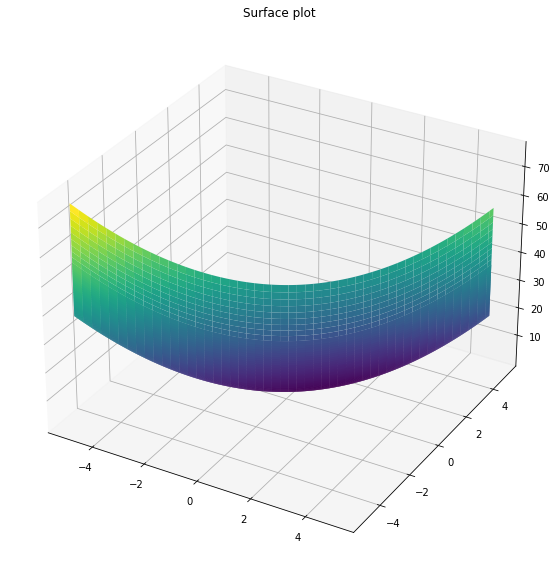

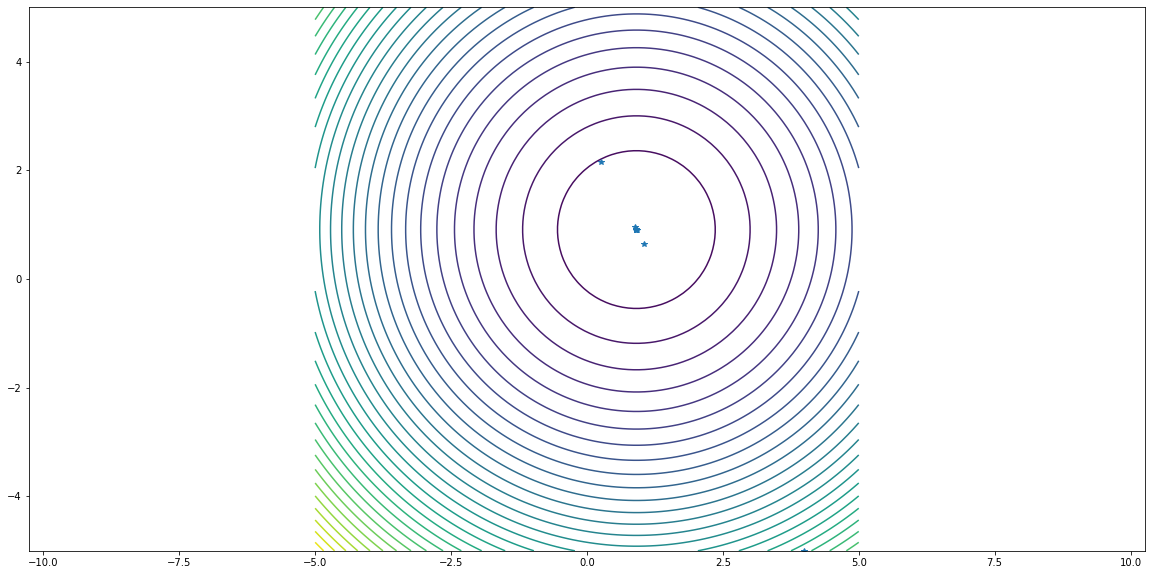

In [11]:
lmbd= 0.1
b= np.array([1,1])

def f(x1, x2, b):
    res= (x1-b[0])**2 + (x2-b[1])**2  + lmbd*(x1**2) + lmbd*(x2**2)
    return res

def grad_f(x,b):
    return 2*(1+lmbd)*x-2*b


step= 0.1
MAXITERATIONS= 100
ABSOLUTE_STOP= 1.e-5
mode="backtrack"
(x, g, i)= minimize(4, -5, b, mode, step, MAXITERATIONS, ABSOLUTE_STOP)